## Logistic Regression Multi-class

In this notebook we're going to look at a simulated multi-class logistic regression problem. And we'll explore scoring a multiclass problem using AUC, Accuracy, f1_score

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(n_samples=900, 
                           n_redundant=1, 
                           n_clusters_per_class=1, 
                           n_features=3, 
                           n_classes=3, 
                           weights=[0.34, .33, 0.33],
                           random_state=45)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

## check sizes of output...

In [2]:
labels = { 0: "dogs", 1: "cats", 2: "fish" }

idx_class_0 = y_train == 0 
idx_class_1 = y_train == 1 
idx_class_2 = y_train == 2

In [3]:
y_train_n = y_train.shape[0]
y_test_n = y_test.shape[0]
print(f"Percentage of dogs in train:{y_train[idx_class_0].shape[0] / y_train_n:.2f}")
print(f"Percentage of cats in train:{y_train[idx_class_1].shape[0] / y_train_n:.2f}")
print(f"Percentage of fish in train:{y_train[idx_class_2].shape[0] / y_train_n:.2f}")

print(f"Percentage of dogs in test:{y_test[y_test == 0].shape[0] / y_test_n:.2f}")
print(f"Percentage of cats in test:{y_test[y_test == 1].shape[0] / y_test_n:.2f}")
print(f"Percentage of fish in test:{y_test[y_test == 2].shape[0] / y_test_n:.2f}")

Percentage of dogs in train:0.34
Percentage of cats in train:0.33
Percentage of fish in train:0.33
Percentage of dogs in test:0.34
Percentage of cats in test:0.33
Percentage of fish in test:0.32


### plot

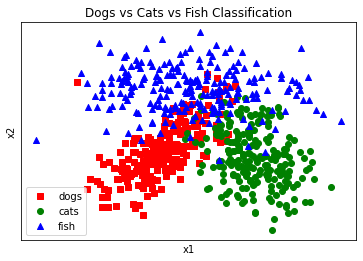

In [4]:
plt.scatter(X_train[idx_class_0, 0], X_train[idx_class_0, 1], color='red', marker='s', label=labels[0])
plt.scatter(X_train[idx_class_1, 0], X_train[idx_class_1, 1], color='green', marker='o', label=labels[1])
plt.scatter(X_train[idx_class_2, 0], X_train[idx_class_2, 1], color='blue', marker='^', label=labels[2])

plt.title("Dogs vs Cats vs Fish Classification")
plt.xlabel("x1")
plt.ylabel("x2")
plt.xticks([])
plt.yticks([])
plt.legend()
plt.show()

### logistic regression model

In [5]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(X_train, y_train)

### Evaluate model - Classification Report

In [6]:
list(labels.values())

['dogs', 'cats', 'fish']

In [7]:
list(labels.keys())

[0, 1, 2]

In [8]:
from sklearn.metrics import classification_report
report = classification_report(y_train, model.predict(X_train), 
                               labels=list(labels.keys()),    
                               target_names=list(labels.values()))
print(report)

              precision    recall  f1-score   support

        dogs       0.90      0.86      0.88       230
        cats       0.90      0.91      0.91       225
        fish       0.82      0.85      0.83       220

    accuracy                           0.87       675
   macro avg       0.87      0.87      0.87       675
weighted avg       0.87      0.87      0.87       675



### Evaluate Model Confusion Matrix

Matplotlib colormap reference:
https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html

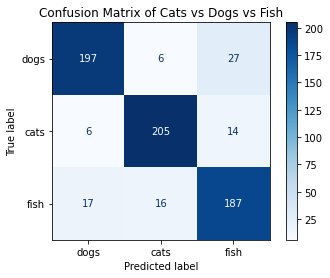

In [9]:
from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(model, X_train, y_train, 
                             include_values=True, 
                             cmap=plt.cm.Blues,
                             values_format='d',
                             display_labels=labels.values())
_ = disp.ax_.set_title("Confusion Matrix of Cats vs Dogs vs Fish")

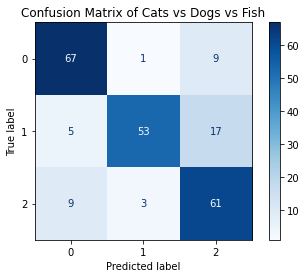

In [10]:
disp = plot_confusion_matrix(model, X_test, y_test, 
                             include_values=True, 
                             cmap=plt.cm.Blues,
                             display_labels=labels)
_ = disp.ax_.set_title("Confusion Matrix of Cats vs Dogs vs Fish")

### ROC/AUC

In [11]:
y_test_scores = model.predict_proba(X_test)

In [12]:
y_test_scores[0]

array([0.89065373, 0.03423109, 0.07511519])

In [13]:
from sklearn.metrics import roc_auc_score

y_test_scores = model.predict_proba(X_test)
y_train_scores = model.predict_proba(X_train)
test_auc = roc_auc_score(y_test, y_test_scores, multi_class='ovr')
train_auc = roc_auc_score(y_train, y_train_scores, multi_class='ovr')

print(f"Test AUC:{test_auc:.2f}")
print(f"Train AUC:{train_auc:.2f}")

Test AUC:0.92
Train AUC:0.96


## f1 score

In [14]:
from sklearn.metrics import f1_score
f1_score(y_test, model.predict(X_test), average='macro', labels=[0,2])

0.8053006329113925

## Accuracy

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, model.predict(X_test))

0.8044444444444444